In [ ]:
# Import library
from google.colab import drive

# Mount  Google Drive /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import library Pandas
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/smote_data.csv')
newdata = pd.read_csv('/content/drive/MyDrive/Dataset/DataCITASI.csv')

In [ ]:
Xnewdata = newdata[['BOD', 'COD', 'FecalColiform', 'IP']]
ynewdata = newdata['Class']

In [ ]:
X = data[['BOD', 'COD', 'FecalColiform', 'IP']]
y = data['Class']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming 'X' is your feature matrix, and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a K-Nearest Neighbors classifier with Euclidean distance
knn_classifier = KNeighborsClassifier(metric='euclidean', p=2, n_neighbors=10)

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (K-Nearest Neighbors):", accuracy_knn)

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print("Precision (K-Nearest Neighbors):", precision_knn)

recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print("Recall (K-Nearest Neighbors):", recall_knn)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("F1 Score (K-Nearest Neighbors):", f1_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (K-Nearest Neighbors):")
print(conf_matrix_knn)

class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report (K-Nearest Neighbors):")
print(class_report_knn)



Accuracy (K-Nearest Neighbors): 0.9192708333333334
Precision (K-Nearest Neighbors): 0.9342193646208793
Recall (K-Nearest Neighbors): 0.9192708333333334
F1 Score (K-Nearest Neighbors): 0.9178898762485407
Confusion Matrix (K-Nearest Neighbors):
[[127   0   0]
 [ 30  98   1]
 [  0   0 128]]
Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           1       0.81      1.00      0.89       127
           2       1.00      0.76      0.86       129
           3       0.99      1.00      1.00       128

    accuracy                           0.92       384
   macro avg       0.93      0.92      0.92       384
weighted avg       0.93      0.92      0.92       384



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Use the trained KNN model to make predictions on the new data
new_data_predictions = knn_classifier.predict(Xnewdata)

# Evaluate the predictions
accuracy_new_data = accuracy_score(ynewdata, new_data_predictions)
precision_new_data = precision_score(ynewdata, new_data_predictions, average='weighted')
recall_new_data = recall_score(ynewdata, new_data_predictions, average='weighted')
f1_new_data = f1_score(ynewdata, new_data_predictions, average='weighted')
conf_matrix_new_data = confusion_matrix(ynewdata, new_data_predictions)
class_report_new_data = classification_report(ynewdata, new_data_predictions)

# Print or use the evaluation metrics if needed
print("Accuracy (New Data):", accuracy_new_data)
print("Precision (New Data):", precision_new_data)
print("Recall (New Data):", recall_new_data)
print("F1 Score (New Data):", f1_new_data)
print("Confusion Matrix (New Data):")
print(conf_matrix_new_data)
print("Classification Report (New Data):")
print(class_report_new_data)


Accuracy (New Data): 0.6821782178217822
Precision (New Data): 0.6164230708785166
Recall (New Data): 0.6821782178217822
F1 Score (New Data): 0.5546293982497982
Confusion Matrix (New Data):
[[  0   1   9   0]
 [  0   1 305   0]
 [  0   0 688   0]
 [  0   0   6   0]]
Classification Report (New Data):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.50      0.00      0.01       306
           3       0.68      1.00      0.81       688
           4       0.00      0.00      0.00         6

    accuracy                           0.68      1010
   macro avg       0.30      0.25      0.20      1010
weighted avg       0.62      0.68      0.55      1010



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

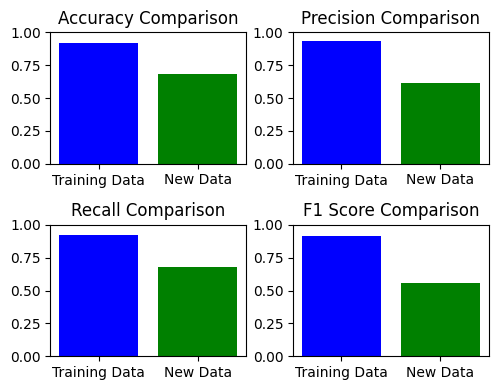

In [ ]:
import matplotlib.pyplot as plt

# Define evaluation metrics for both training and new data
accuracy_scores = [accuracy_knn, accuracy_new_data]
precision_scores = [precision_knn, precision_new_data]
recall_scores = [recall_knn, recall_new_data]
f1_scores = [f1_knn, f1_new_data]

# Define labels for the x-axis
labels = ['Training Data', 'New Data']

# Plot the comparison graph
plt.figure(figsize=(5, 4))

plt.subplot(2, 2, 1)
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.ylim(0, 1)

plt.subplot(2, 2, 2)
plt.bar(labels, precision_scores, color=['blue', 'green'])
plt.title('Precision Comparison')
plt.ylim(0, 1)

plt.subplot(2, 2, 3)
plt.bar(labels, recall_scores, color=['blue', 'green'])
plt.title('Recall Comparison')
plt.ylim(0, 1)

plt.subplot(2, 2, 4)
plt.bar(labels, f1_scores, color=['blue', 'green'])
plt.title('F1 Score Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
